In [5]:
pip install openpyxl xlrd

In [6]:
!apt-get install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [7]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [8]:
!pip install pyxlsb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("preprocessed_data.xlsx", engine="openpyxl")

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [3]:
df.shape

(48433, 13)

In [4]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 8
Integer variables: 4
Float variables: 1


In [5]:
print(df.dtypes)


Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object


In [6]:
df_numeric = df.copy()

# Convert categorical columns to numerical using label encoding
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

# Now, check if we have numerical data
print(df_numeric.dtypes)

Suburb             int16
Address            int32
Rooms              int64
Type                int8
Price              int64
Method              int8
SellerG            int16
Date                int8
Postcode           int64
Regionname          int8
Propertycount      int64
Distance         float64
CouncilArea         int8
dtype: object


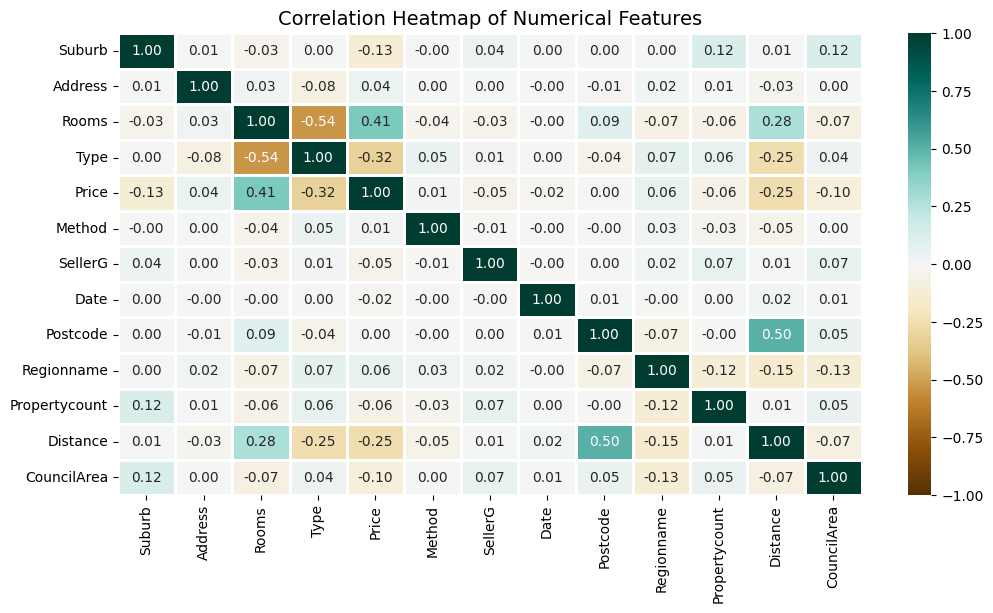

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features
numerical_df = df_numeric.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

if corr_matrix.empty:
    print("Still no numerical features available. Check your data!")
else:
    plt.figure(figsize=(12, 6))
    sns.heatmap(corr_matrix, cmap='BrBG', fmt='.2f', linewidths=2, annot=True, vmin=-1, vmax=1, annot_kws={"size": 10})
    plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
    plt.show()

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

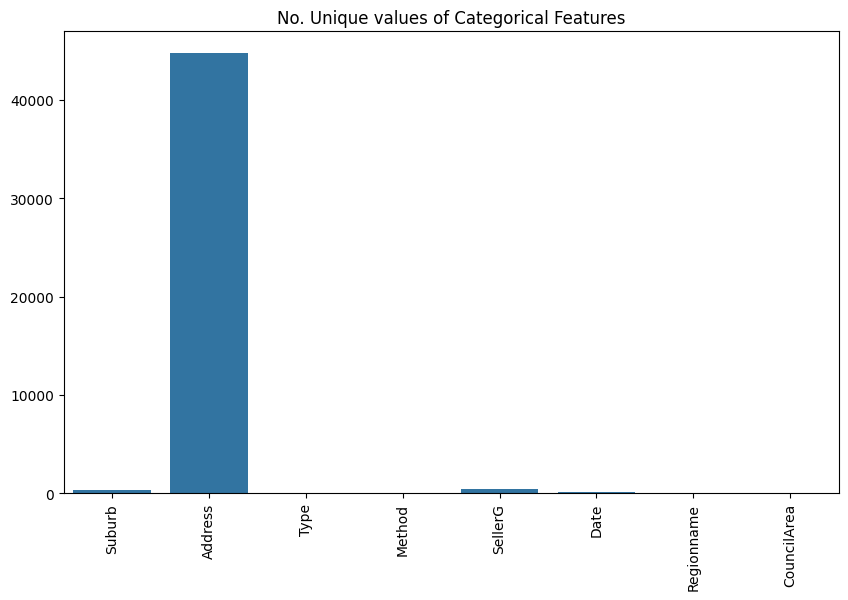

In [8]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [9]:
print(df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')


In [10]:
print(df.isnull().sum())  # Count missing values in each column

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64


In [11]:

df.dropna(inplace=True)  # Drop missing rows

In [12]:
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column as target

In [13]:
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Initialize model
model.fit(X_train, y_train)  # Train model